In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load CSV

- Load the CSV file containing the scores data
- Filter the data to include only the "Foundations of ML" course

In [3]:
df = pd.read_csv('data/raw/scores.csv')
df = df[df['CourseName'] == 'Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


### Load features and scale

In [4]:
def min_max_scale(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    X_scaled = (X - X_min) / (X_max - X_min)
    return X_scaled, X_min, X_max

In [5]:
X_attendance = df['Attendance'].values
X_attendance_scaled, X_attendance_min, X_attendance_max = min_max_scale(X_attendance.reshape(-1, 1))

X_study_hours = df['TotalHours'].values
X_study_hours_scaled, X_study_hours_min, X_study_hours_max = min_max_scale(X_study_hours.reshape(-1, 1))

X_assignments = df['AssignmentsCompleted'].values
X_assignments_scaled, X_assignments_min, X_assignments_max = min_max_scale(X_assignments.reshape(-1, 1))

X_quiz = df['PeerReviewScore'].values
X_quiz_scaled, X_quiz_min, X_quiz_max = min_max_scale(X_quiz.reshape(-1, 1))

X_participation = df['HackathonParticipation'].values
X_participation_scaled, X_participation_min, X_participation_max = min_max_scale(X_participation.reshape(-1, 1))

In [6]:
X = np.column_stack([
    np.ones(len(df)),
    X_attendance_scaled.flatten(),
    X_study_hours_scaled.flatten(),
    X_assignments_scaled.flatten(),
    X_quiz_scaled.flatten(),
    X_participation_scaled.flatten()
])

y = (df['CapstoneScore'] >= 75).astype(int)

### Util functions

- format_value_for_printing: Format values for better readability

In [7]:
def format_value_for_printing(value):
    if np.isinf(value):
        return "∞"
    elif np.isnan(value):
        return "NaN"
    else:
        return f"{value:.4f}"

### Analyzing Functions

In [8]:
# Constants
CONVERGENCE_THRESHOLD = 1e-6

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_logistic_cost(X, y, theta):
    m = len(y)
    z = X @ theta
    h = sigmoid(z)

    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    return cost

def compute_logistic_gradients(X, y, theta):
    m = len(y)
    z = X @ theta
    h = sigmoid(z)

    gradients = (1/m) * X.T @ (h - y)
    return gradients

def logistic_gradient_descent(X, y, learning_rate):
    n_features = X.shape[1]
    theta = np.random.normal(0, 0.01, n_features)
    n_iterations = 100000
    cost_history = []
    converged = False

    for i in range(n_iterations):
        cost = compute_logistic_cost(X, y, theta)
        cost_history.append(cost)

        gradients = compute_logistic_gradients(X, y, theta)

        theta = theta - learning_rate * gradients

        # Check for convergence
        if i > 10:
            change = abs(cost_history[-1] - cost_history[-10])
            if change < CONVERGENCE_THRESHOLD:
                print(f"Converged at {i}")
                converged = True
                break

        # Check for non convergence
        if np.isinf(cost):
            print("Cost diverged. Exiting...")
            break

    return theta, cost_history, converged

def predict_proba(X, theta):
    z = X @ theta
    return sigmoid(z)

def predict_class(X, theta, threshold=0.5):
    probabilities = predict_proba(X, theta)
    return (probabilities >= threshold).astype(int)

### Prediction

In [10]:
thresholds = [0.3, 0.5, 0.7]
results = {}

for threshold in thresholds:
    theta, costs, converged = logistic_gradient_descent(X, y, learning_rate=0.1)

    y_prob = predict_proba(X, theta)
    y_pred = predict_class(X, theta, threshold=threshold)

    results[threshold] = {
        'theta': theta,
        'costs': costs,
        'converged': converged,
        'y_prob': y_prob,
        'y_pred': y_pred,
        'final_cost': costs[-1],
        'iterations': len(costs)
    }

Converged at 83291
Converged at 83293
Converged at 83293


### Summary of analysis

In [11]:
print("\n" + "="*60)
print("THRESHOLD ANALYSIS SUMMARY")
print("="*60)
print(f"{'Threshold':<15} {'Final Cost':<12} {'Converged':<10} {'Iterations':<12}")
print("-"*60)

for threshold in thresholds:
    r = results[threshold]
    print(f"{threshold:<15} {format_value_for_printing(r['final_cost']):<12} {str(r['converged']):<10} {r['iterations']:<12}")


THRESHOLD ANALYSIS SUMMARY
Threshold       Final Cost   Converged  Iterations  
------------------------------------------------------------
0.3             0.0873       True       83292       
0.5             0.0873       True       83294       
0.7             0.0873       True       83294       


### Visualize results

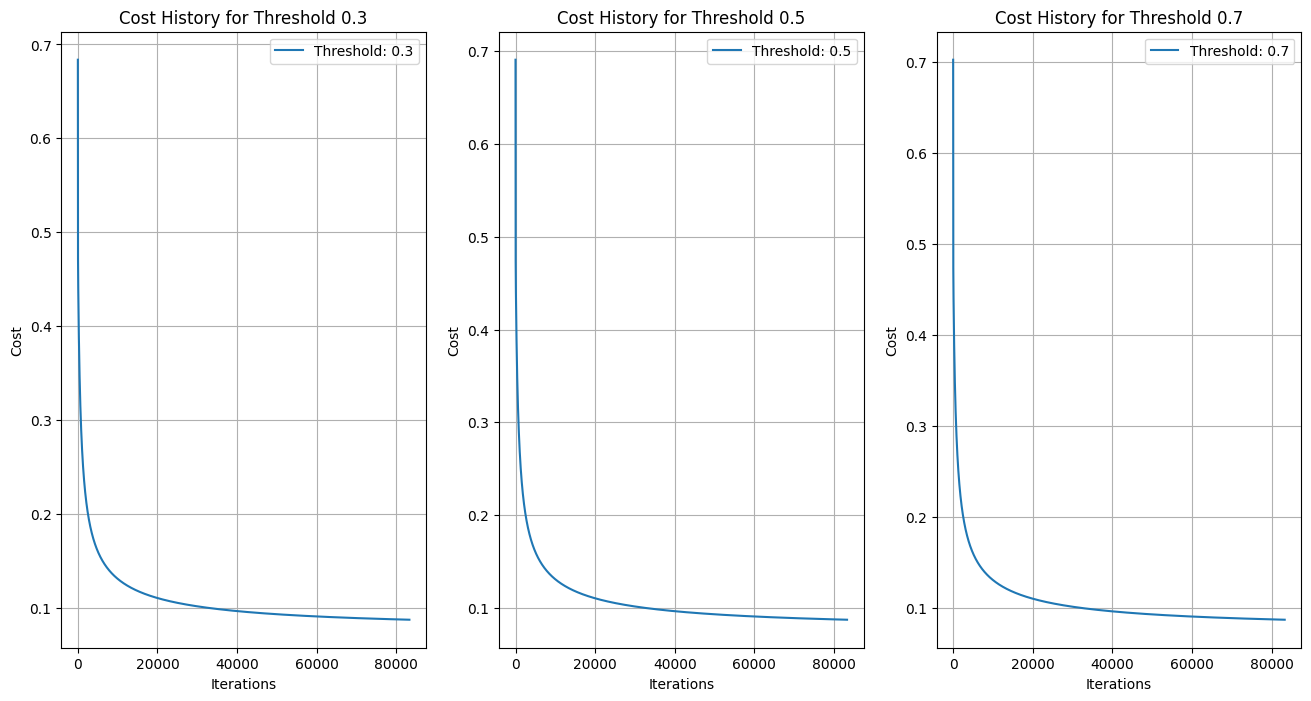

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

for col in range(3):
    ax = axes[col]
    threshold = thresholds[col]
    costs = results[threshold]['costs']

    ax.plot(costs, label=f'Threshold: {threshold}')
    ax.set_title(f'Cost History for Threshold {threshold}')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.legend()
    ax.grid()

### Evaluation metrics

In [13]:
def calculate_evaluation_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, tp, fp, tn, fn, precision, recall, f1

In [14]:
print("\n" + "="*70)
print("EVALUATION SUMMARY")
print("="*70)
print(f"{'Threshold':<15} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1':<12}")
print("-"*70)

evaluations = {}

for threshold in thresholds:
    r = results[threshold]
    accuracy, tp, fp, tn, fn, precision, recall, f1 = calculate_evaluation_metrics(y, r['y_pred'])
    print(f"{threshold:<15} {format_value_for_printing(accuracy):<12} {format_value_for_printing(precision):<12} {format_value_for_printing(recall):<12} {format_value_for_printing(f1):<12}")

    evaluations[threshold] = {
        'accuracy': accuracy,
        'tp': tp,
        'fp': fp,
        'tn': tn,
        'fn': fn,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


EVALUATION SUMMARY
Threshold       Accuracy     Precision    Recall       F1          
----------------------------------------------------------------------
0.3             0.9444       0.7857       0.9167       0.8462      
0.5             0.9583       0.8462       0.9167       0.8800      
0.7             0.9861       1.0000       0.9167       0.9565      


#### Confusion Matrix

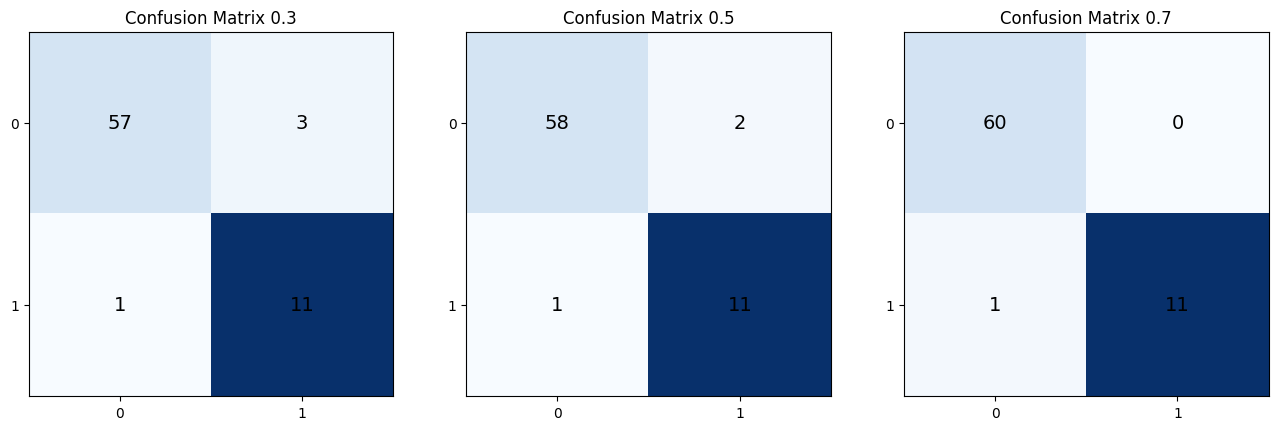

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

for col in range(3):
    ax = axes[col]
    threshold = thresholds[col]
    cm = np.array([evaluations[threshold]['tp'], evaluations[threshold]['fp'],
                   evaluations[threshold]['fn'], evaluations[threshold]['tn']]).reshape(2, 2)

    ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(f'Confusion Matrix {threshold}')
    ax.text(0, 0, evaluations[threshold]['tn'], ha='center', va='center', fontsize=14)
    ax.text(1, 0, evaluations[threshold]['fp'], ha='center', va='center', fontsize=14)
    ax.text(0, 1, evaluations[threshold]['fn'], ha='center', va='center', fontsize=14)
    ax.text(1, 1, evaluations[threshold]['tp'], ha='center', va='center', fontsize=14)

    labels = ['0', '1']
    tick_marks = np.arange(2)
    ax.set_xticks(tick_marks, labels)
    ax.set_yticks(tick_marks, labels)